In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#read in the data and put into DataFrames
users = pd.read_csv('CSVs/takehome_users.csv', encoding = "latin")
engagement = pd.read_csv('/Users/chrisjohanson/Desktop/relax_challenge/CSVs/takehome_user_engagement.csv')

In [3]:
#look over users
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
#look over engagement
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
#make all of those change to engagement

In [6]:
#change time_stamp to datetime
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])
#create column for dates that are 7 days ahead of time_stamp
engagement['7 days'] = engagement['time_stamp']+datetime.timedelta(days=7)

In [7]:
#create empty dictionary to keep track of whether each user's adopter user status
user_adoption_data = {}
#iterate through each user
for user in engagement['user_id'].unique():
    #create a dataframe with only the user's engagement
    df = engagement[engagement['user_id'] == user]
    #iterate through each user's engagement and create visit counts for 7 day periods
    for i in range(len(df)):
        #create a visit count for 7 day period (period starts at ith date)
        visit_count = df[(df['time_stamp'] >= df['time_stamp'].iloc[i]) & (df['time_stamp'] <= df['7 days'].iloc[i])]['visited'].sum()

        if visit_count >= 3:
            user_adoption_data[user] = True
            break
        else:
            user_adoption_data[user] = False


In [8]:
df_user_adoption = pd.DataFrame(user_adoption_data.items(), columns=['user_id', 'is_adopted'])

In [9]:
users_final = pd.merge(users, df_user_adoption, how='inner', 
                       left_on='object_id', right_on='user_id').drop('user_id', axis=1)

In [10]:
users_final.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,is_adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


In [11]:
#drop object_id, name, email since they wouldn't impact user adoption
users_final.drop(['object_id', 'name', 'email'], axis=1, inplace=True)
#drop creation time and last session time since they wouldn't impact adoption
users_final.drop(['creation_time', 'last_session_creation_time'], axis=1, inplace=True)
users_final.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,is_adopted
0,GUEST_INVITE,1,0,11,10803.0,False
1,ORG_INVITE,0,0,1,316.0,True
2,ORG_INVITE,0,0,94,1525.0,False
3,GUEST_INVITE,0,0,1,5151.0,False
4,GUEST_INVITE,0,0,193,5240.0,False


In [12]:
#change creation source from string to integer
users_final['creation_source'] = users_final.groupby('creation_source').ngroup()

In [13]:
#change is adopted from bool to integer
users_final['is_adopted'] = users_final.groupby('is_adopted').ngroup()
users_final.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,is_adopted
0,0,1,0,11,10803.0,0
1,1,0,0,1,316.0,1
2,1,0,0,94,1525.0,0
3,0,0,0,1,5151.0,0
4,0,0,0,193,5240.0,0


In [14]:
#check for null values
users_final.isnull().sum()

creation_source                  0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            4047
is_adopted                       0
dtype: int64

In [15]:
#change nulls in invited by user id to 0s
users_final['invited_by_user_id'] = users_final['invited_by_user_id'].fillna(0)

In [16]:
users_final.isnull().sum()

creation_source               0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
is_adopted                    0
dtype: int64

In [17]:
#assign target variable to y and features to X
y = users_final['is_adopted']
X = users_final.drop('is_adopted', axis=1)

In [18]:
#import dependencies for ML
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [19]:
#split the data in test set and train set
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [20]:
#use Random Forest Classifier as model
rf = RandomForestClassifier()

In [21]:
#train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
#create list of feature importances
importances = list(rf.feature_importances_)
#create list of columns, minus the last column which is target variable
feature_columns = list(users_final.columns)[:-1]

In [23]:
importance_results = list(zip(feature_columns, importances))

In [24]:
results_df = pd.DataFrame(importance_results, columns=['feature', 'feature importance']).sort_values('feature importance', ascending=False)

In [25]:
results_df

,feature,feature importance
3,org_id,0.610560
4,invited_by_user_id,0.327350
0,creation_source,0.031898
1,opted_in_to_mailing_list,0.016210
2,enabled_for_marketing_drip,0.013982


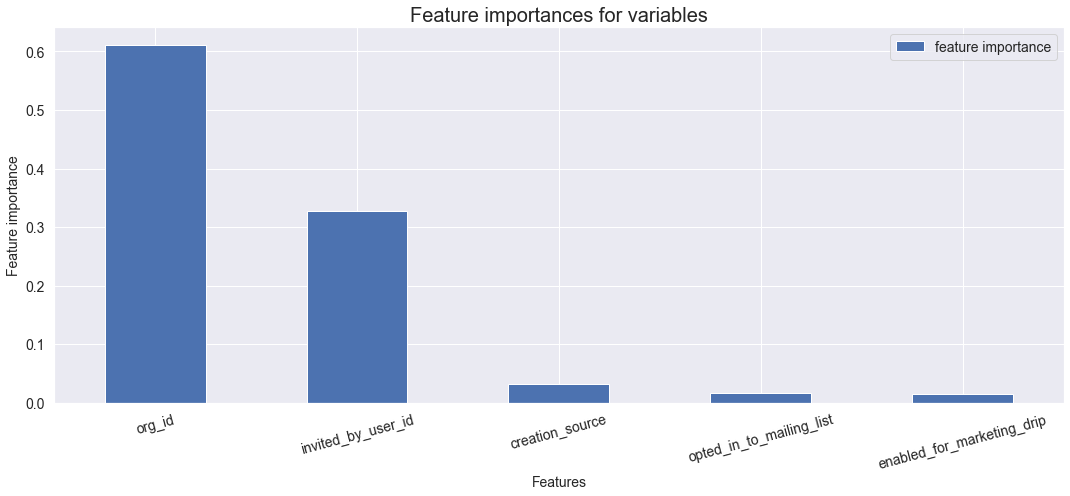

In [26]:
fig, ax = plt.subplots(figsize=(15, 7))

results_df.plot.bar(x='feature', y='feature importance', ax=ax)
_ = plt.title('Feature importances for variables', fontsize=20)
_ = plt.xticks(rotation=15, size=14)
_ = plt.yticks(size=14)
_ = plt.xlabel('Features', size=14)
_ = plt.ylabel('Feature importance', size=14)
_ = plt.legend(fontsize=14)
plt.tight_layout()

plt.savefig('feature importance.png')